I scraped game of thrones book one reviews. Here's a look at them.

In [12]:
from amazon_scraper import AmazonScraper
amazon =  AmazonScraper('', '', '')

In [ ]:
p = amazon.lookup(ItemId='0553593714')
junk=list(p.reviews)
rws_dict=[]
ln= len(junk)
for a in range(0,ln):
    try:
        print a
        rws_dict.append(junk[a].full_review().to_dict())


In [ ]:
#import to serialize for later work
import pickle
pickle.dump(rws,open('lop.p',rb))

In [1]:
rws = pickle.load( open( "lop.p", "rb" ))

In [19]:
rws[2]['text']

u"This book and series are dark--definitely for a mature audience. There is no doubt that Martin is an excellent craftsmen. He knows how to get us into the heads of his different characters, and the span is majestic. However, I am deeply disturbed that this book is included in lists next to J. R. R. Tolkien's Lord of the Rings. These series are nothing alike and should not be included together. Parents should not let their teens read these books--there is too much gratuitous violence and sexual situations. The HBO series feels even more like violence porn than the book, but the heart of that is to be found in the original material. There are so many rave reviews of this series you may ignore this one, but trust me there is a radical difference between this epic fantasy and the classics from the 20th century."

In [8]:
import pandas as pd
import numpy as np

In [15]:
book=pd.DataFrame(rws)

book=book[['date','rating','text','title']]

In [91]:
len(rws)

4453

In [16]:
book.head()

,date,rating,text,title
0,2016-03-30 07:54:43+00:00,0.8,Very well written. I love the character and c...,Great characters
1,2016-03-30 07:04:35+00:00,1.0,Amazing Roy dotrice is the man!,Five Stars
2,2016-03-29 18:21:46+00:00,0.2,This book and series are dark--definitely for ...,"Dark and Twisted Series, Not for Teens"
3,2016-03-29 16:32:26+00:00,1.0,Read it. You won't regret it.,Five Stars
4,2016-03-29 11:09:00+00:00,1.0,"Love, Love Love!!! So brilliant and engaging.",Five Stars


In [78]:
book['year'] = pd.to_datetime(book['date']).dt.year
book['month'] = pd.to_datetime(book['date']).dt.month
book['day'] = pd.to_datetime(book['date']).dt.dayofweek

In [24]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


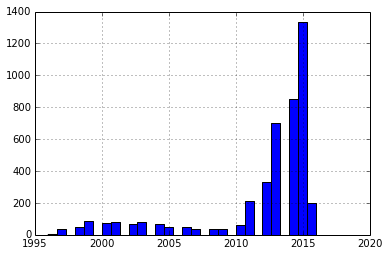

In [77]:
#yearly distribution of book reviews
book['year'].hist(bins=30)

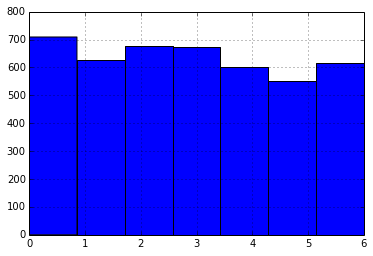

In [83]:
#monthly distribution of book reviews
book['day'].hist(bins=7)

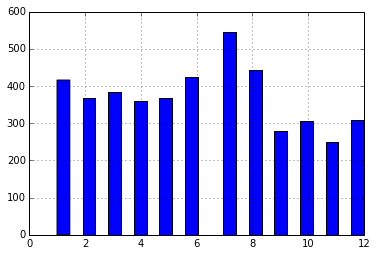

In [76]:
#monthly distribution of book reviews
book['month'].hist(bins=24)

In [29]:
book['wordcount']=book['text'].str.split().apply(lambda x : len(x))

array([<matplotlib.axes.AxesSubplot object at 0x7fc43b4ce3d0>,
       <matplotlib.axes.AxesSubplot object at 0x7fc43b2c33d0>], dtype=object)

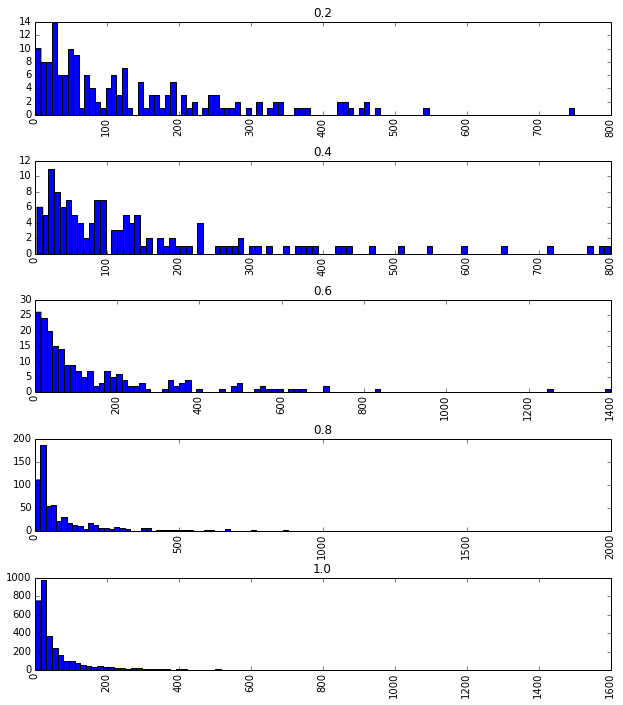

In [89]:
#Distribution of wordcount by rating
book['wordcount'].hist(bins=100,by=book['rating'],figsize=(10,12),layout=(5,1))